Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Read Dataset

In [2]:
df = pd.read_csv('C:/Users/User/summer-products-and-sales-in-ecommerce-wish/summer-products-with-rating-and-performance_2020-08.csv')#
df

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,...,5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,1,3.07,28,11.0,...,4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,EUR,100,0,3.71,59,24.0,...,210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,EUR,100,0,2.50,2,0.0,...,31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08


In [3]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

The column names raises some more possible analysis that can be performed.

- How different is the 'price' from 'retail price' and what is the effect of the difference. Expecting higher number of units sold if price is less than retail price and vice versa.
- Does having ad boosts increase success?
- Any correlation between units sold and ratings?
- What is badges? This looks like 'awards' of some sort? Do success with increase in number of badges?
- What are effect of different type of badges?
- Effect of tags? Higher number of tags results in success?
- Maybe some brief analysis on product variations.. Do increased variations leads to inreased success?
- Shipping options analysis
- Analysis of inventory total and units sold.
- Merchant detail analysis.. Does merchant rating affect success?
- What about the details of the merchant? Does not having a profile picture reduce success? Perhaps detailed info leads to higher success?
- Do all product contains pictures?

Check got any missing values in dataset

In [4]:
df['uses_ad_boosts'] = df['uses_ad_boosts']
df['badge_local_product'] = df['badge_local_product']
df['badge_product_quality'] = df['badge_product_quality']
df['badge_fast_shipping'] = df['badge_fast_shipping']
df['shipping_is_express'] = df['shipping_is_express']
df['has_urgency_banner'] = df['has_urgency_banner']
df['merchant_has_profile_picture'] = df['merchant_has_profile_picture']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [5]:
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [8]:
round(df.describe())

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1528.0,1528.0,1528.0,1528.0,...,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,473.0,1573.0,1573.0,1573.0
mean,8.0,23.0,4339.0,0.0,4.0,890.0,442.0,180.0,135.0,64.0,...,0.0,33.0,2.0,0.0,40.0,50.0,1.0,26496.0,4.0,0.0
std,4.0,30.0,9357.0,0.0,1.0,1984.0,980.0,401.0,312.0,151.0,...,0.0,21.0,1.0,0.0,20.0,3.0,0.0,78474.0,0.0,0.0
min,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,6.0,1.0,1.0,0.0,2.0,0.0
25%,6.0,7.0,100.0,0.0,4.0,24.0,12.0,5.0,4.0,2.0,...,0.0,6.0,2.0,0.0,31.0,50.0,1.0,1987.0,4.0,0.0
50%,8.0,10.0,1000.0,0.0,4.0,150.0,79.0,32.0,24.0,11.0,...,0.0,50.0,2.0,0.0,40.0,50.0,1.0,7936.0,4.0,0.0
75%,11.0,26.0,5000.0,1.0,4.0,855.0,414.0,168.0,129.0,62.0,...,0.0,50.0,3.0,0.0,43.0,50.0,1.0,24564.0,4.0,0.0
max,49.0,252.0,100000.0,1.0,5.0,20744.0,11548.0,4152.0,3658.0,2003.0,...,1.0,50.0,12.0,1.0,140.0,50.0,1.0,2174765.0,5.0,1.0


Histograms and countplots

In [9]:
def histograms_and_countplots(column, data, columns_to_exclude):
    if column not in columns_to_exclude:
        if data[column].dtype not in ['int64', 'float64']:
            f, axes = plt.subplots(1,1,figsize=(15,5))
            sns.countplot(x=column, data = data)
            plt.xticks(rotation=90)
            plt.suptitle(column,fontsize=20)
            plt.show()
        else:
            g = sns.FacetGrid(data, margin_titles=True, aspect=4, height=3)
            g.map(plt.hist,column,bins=100)
            plt.show()
        plt.show()

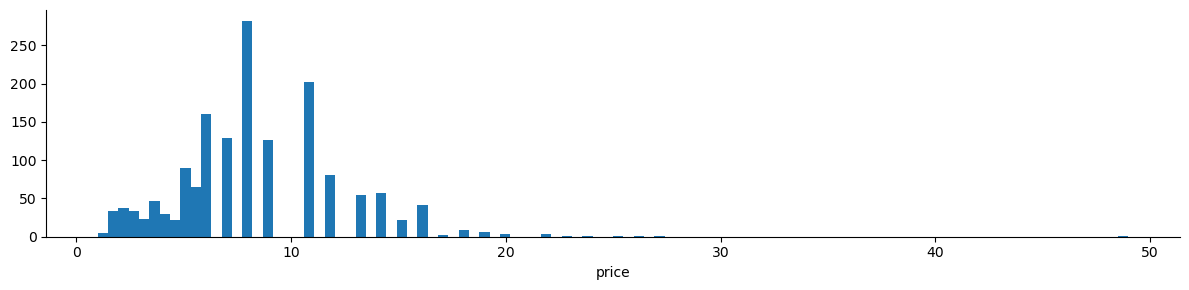

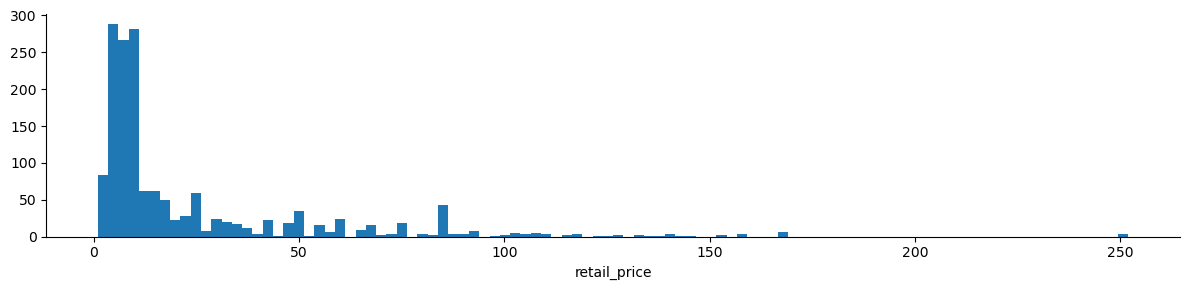

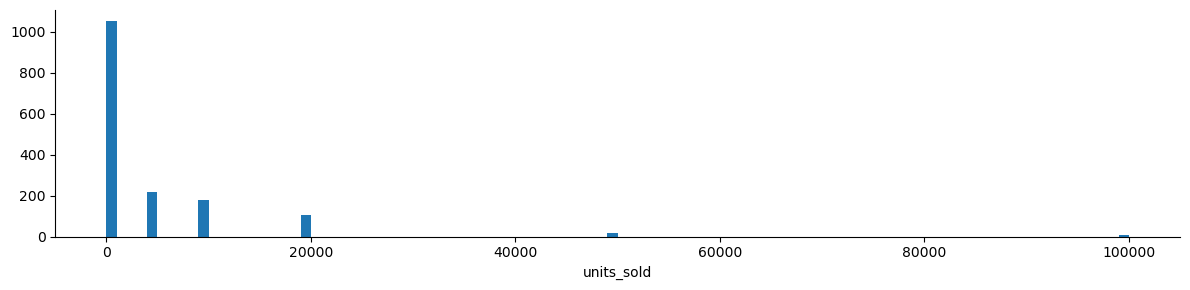

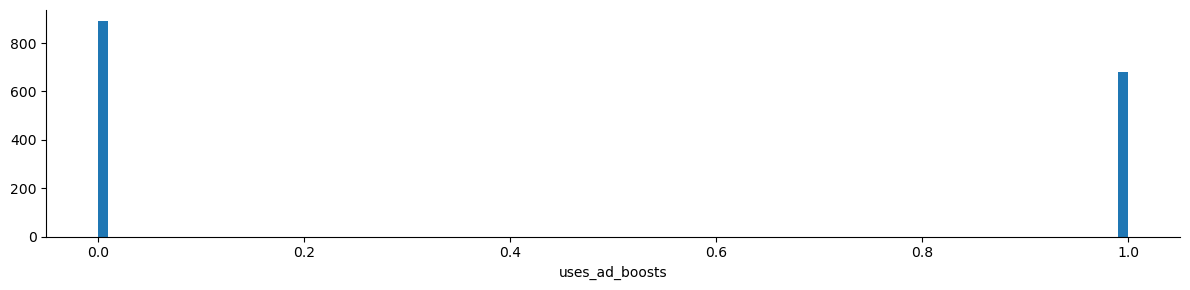

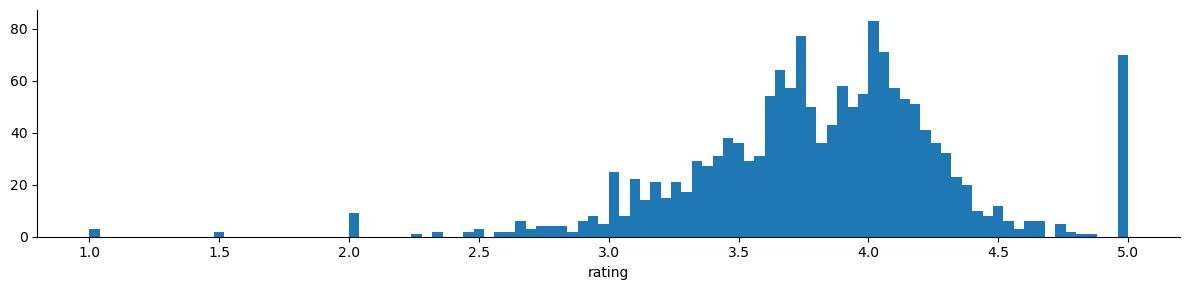

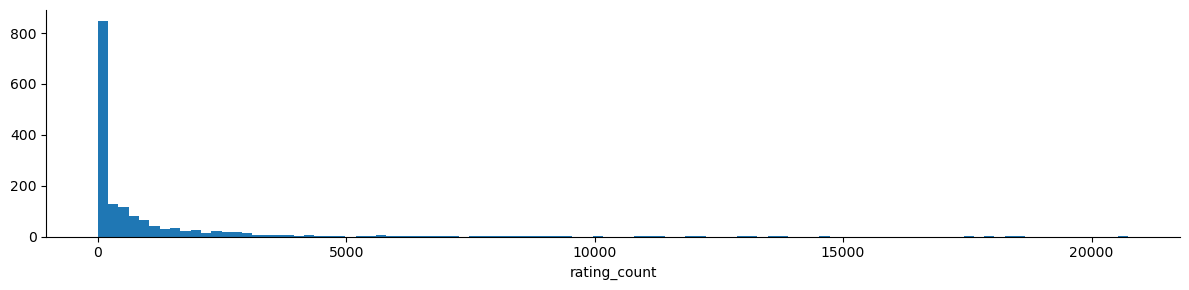

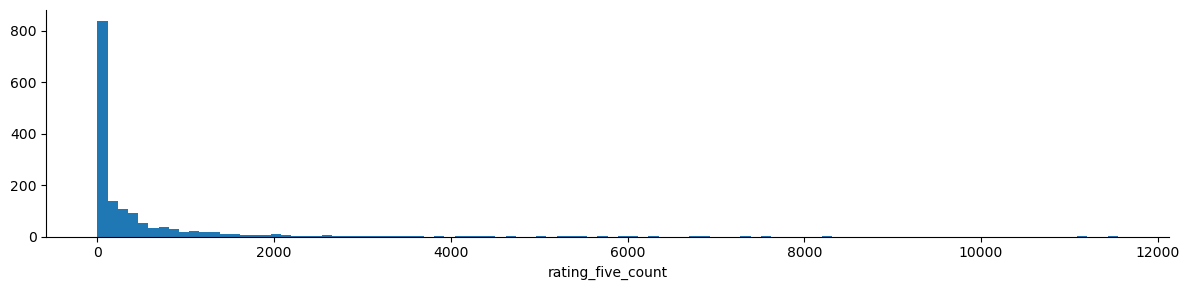

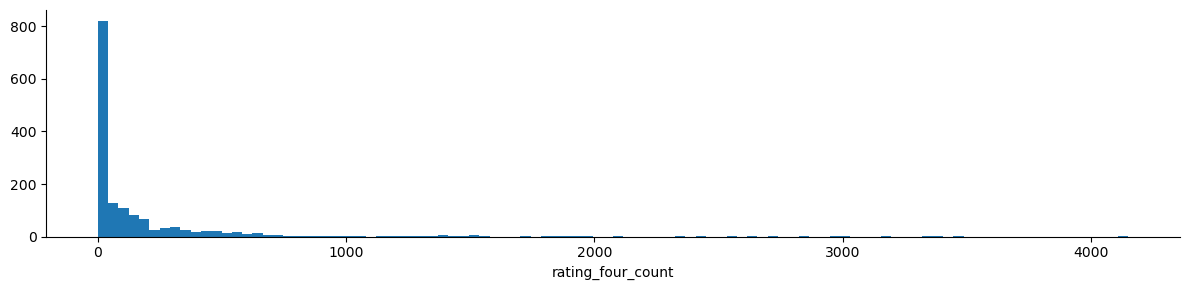

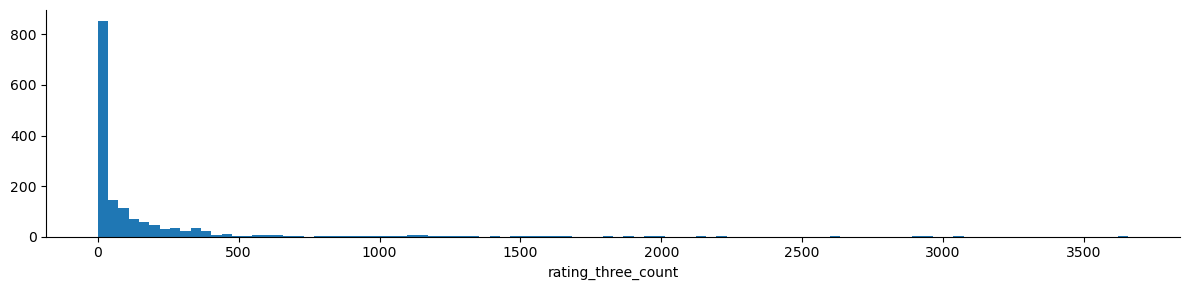

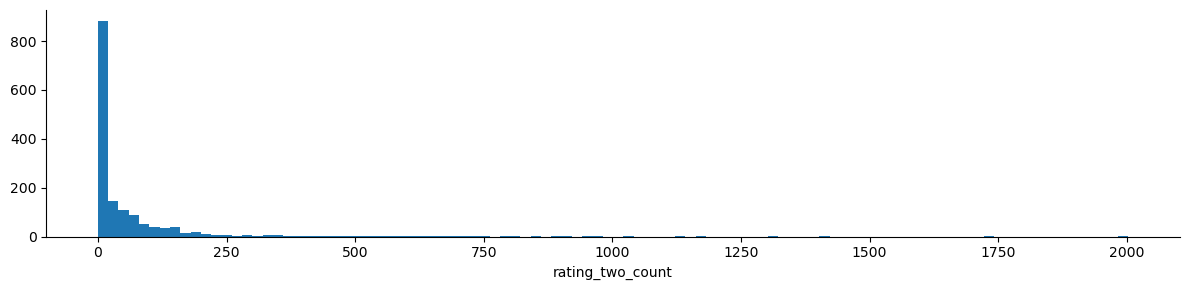

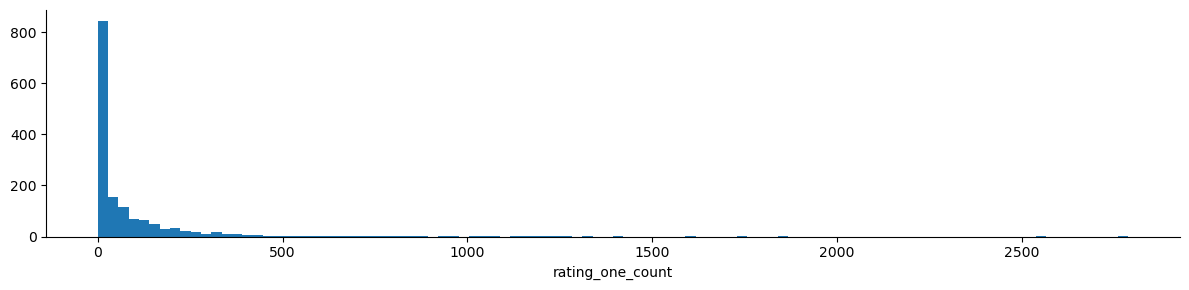

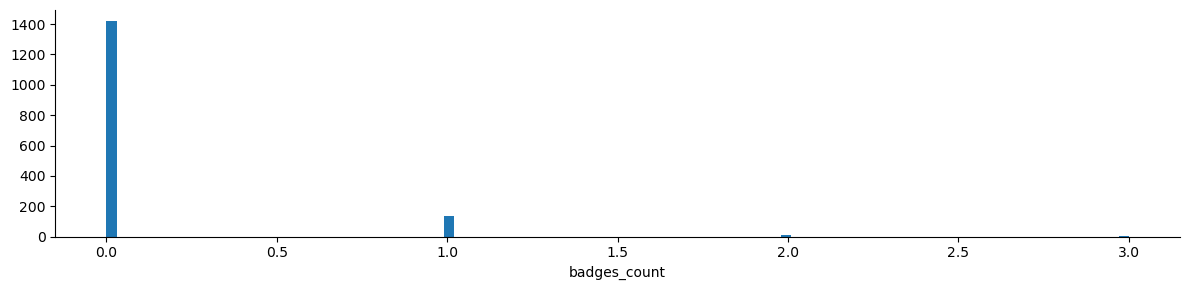

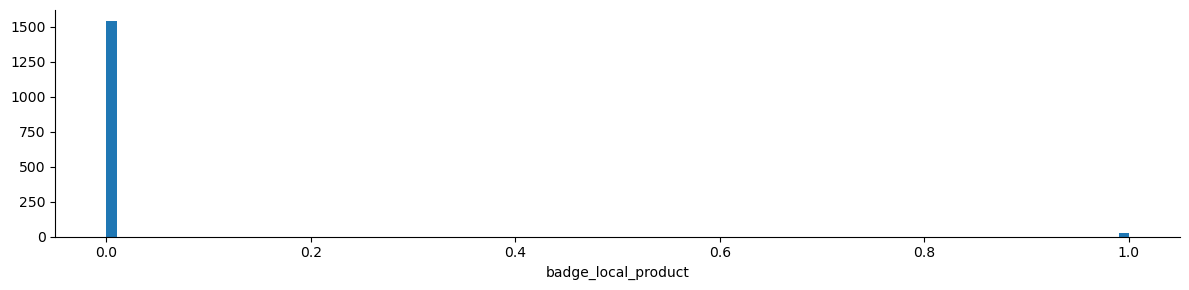

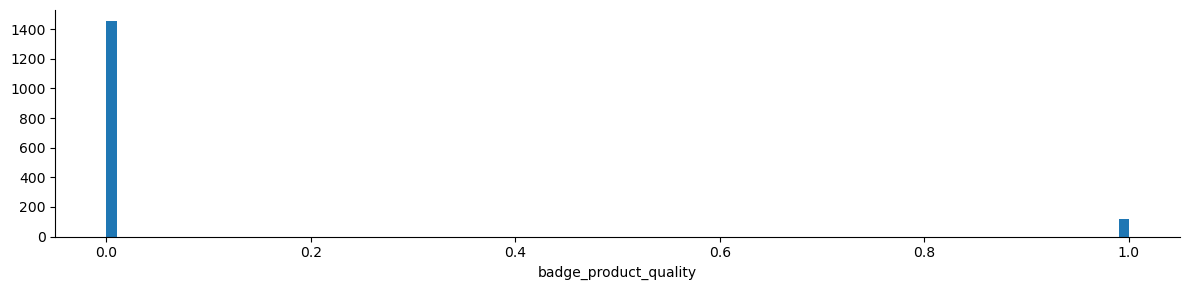

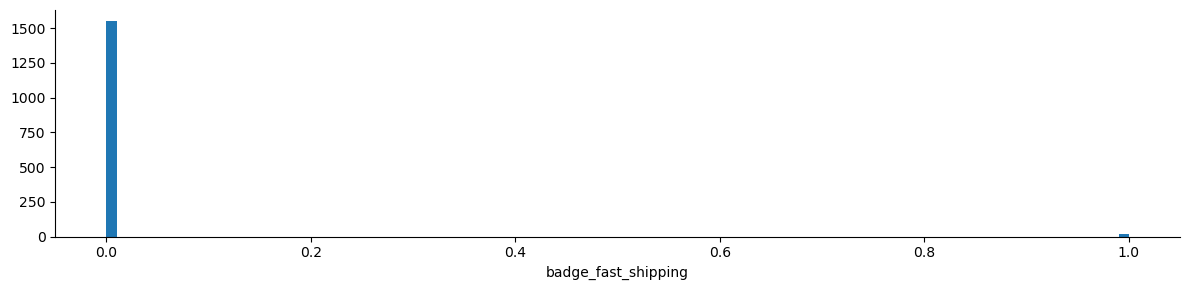

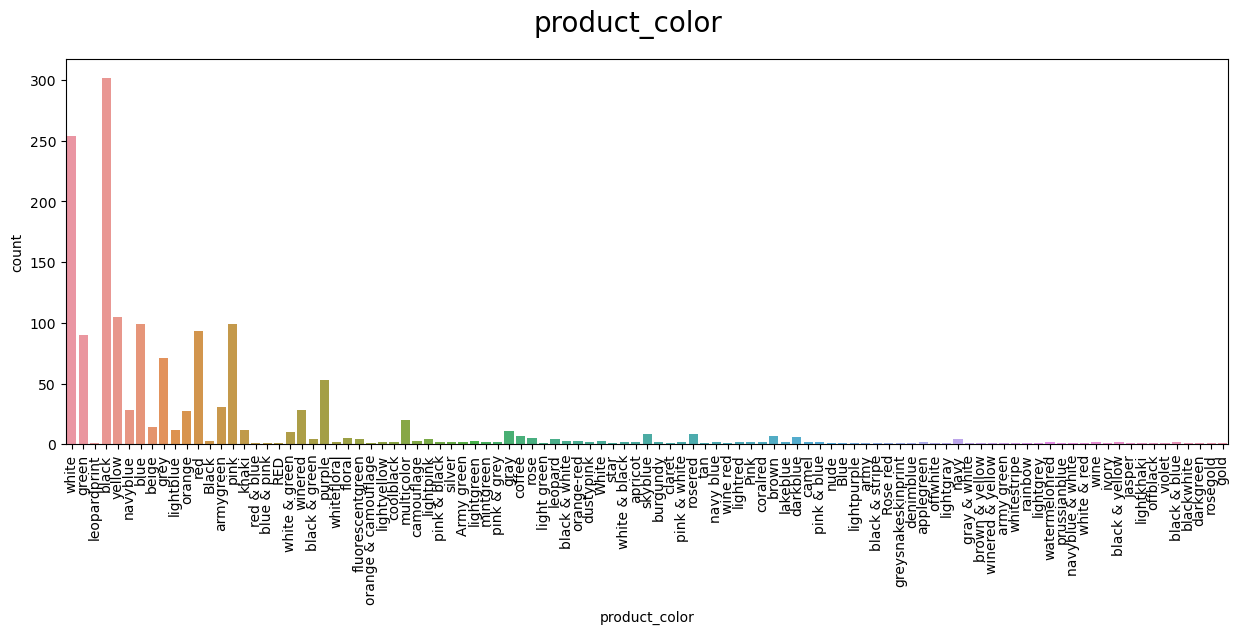

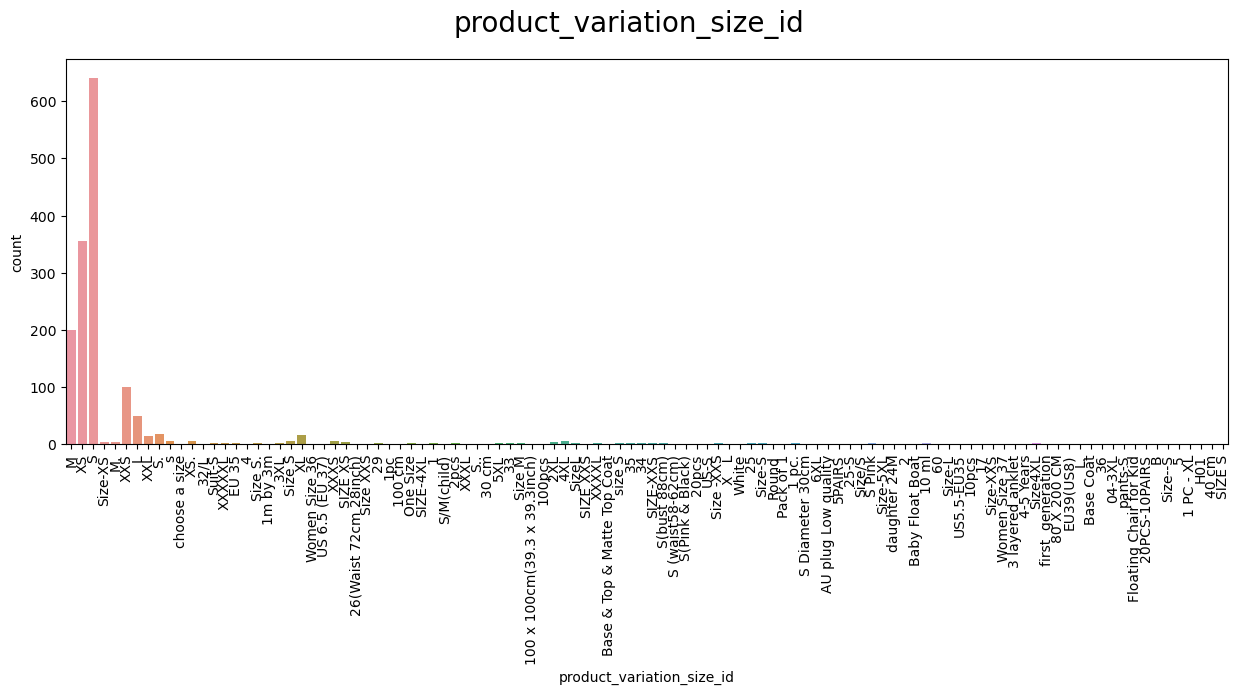

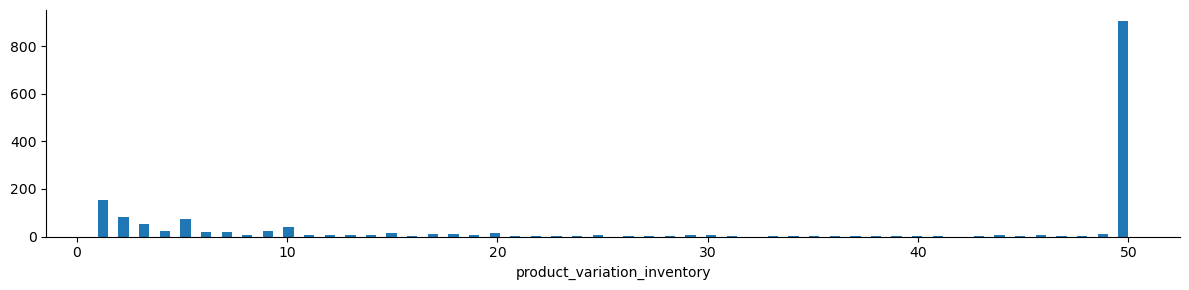

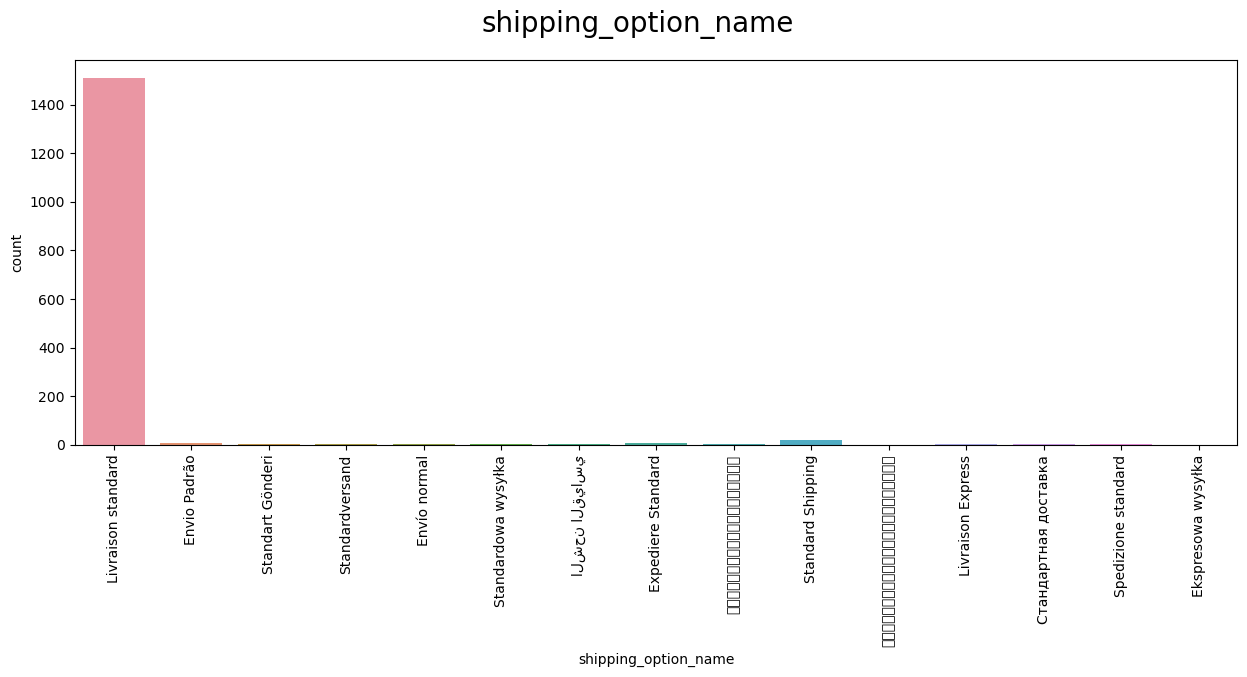

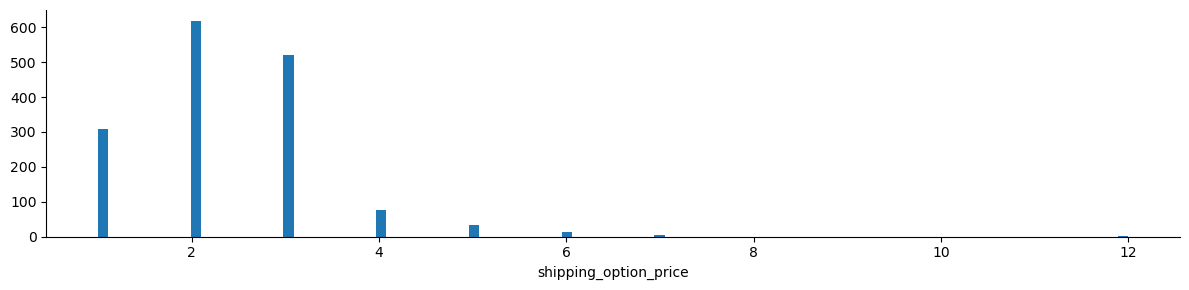

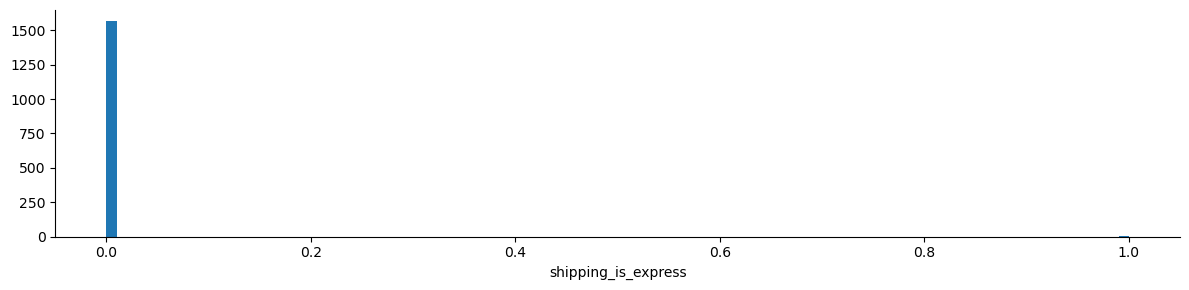

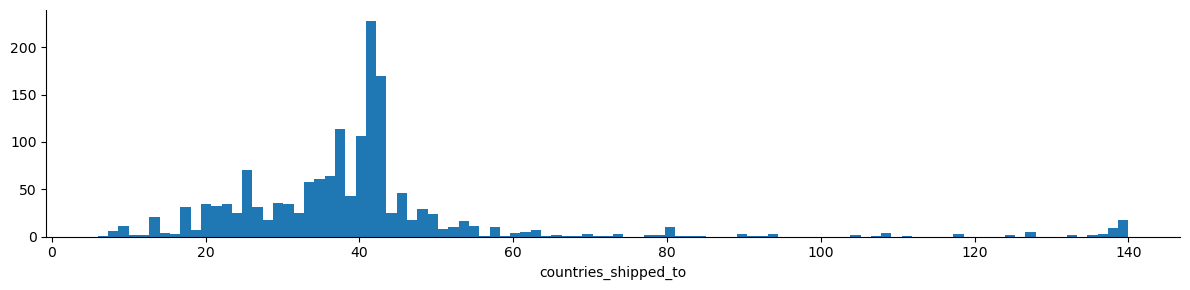

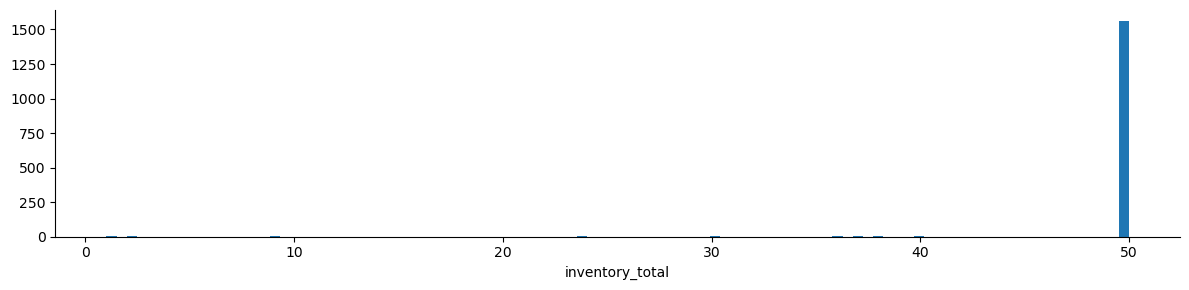

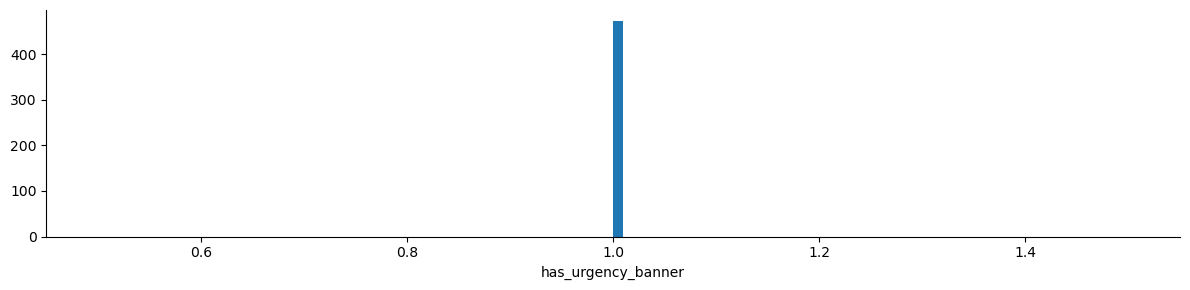

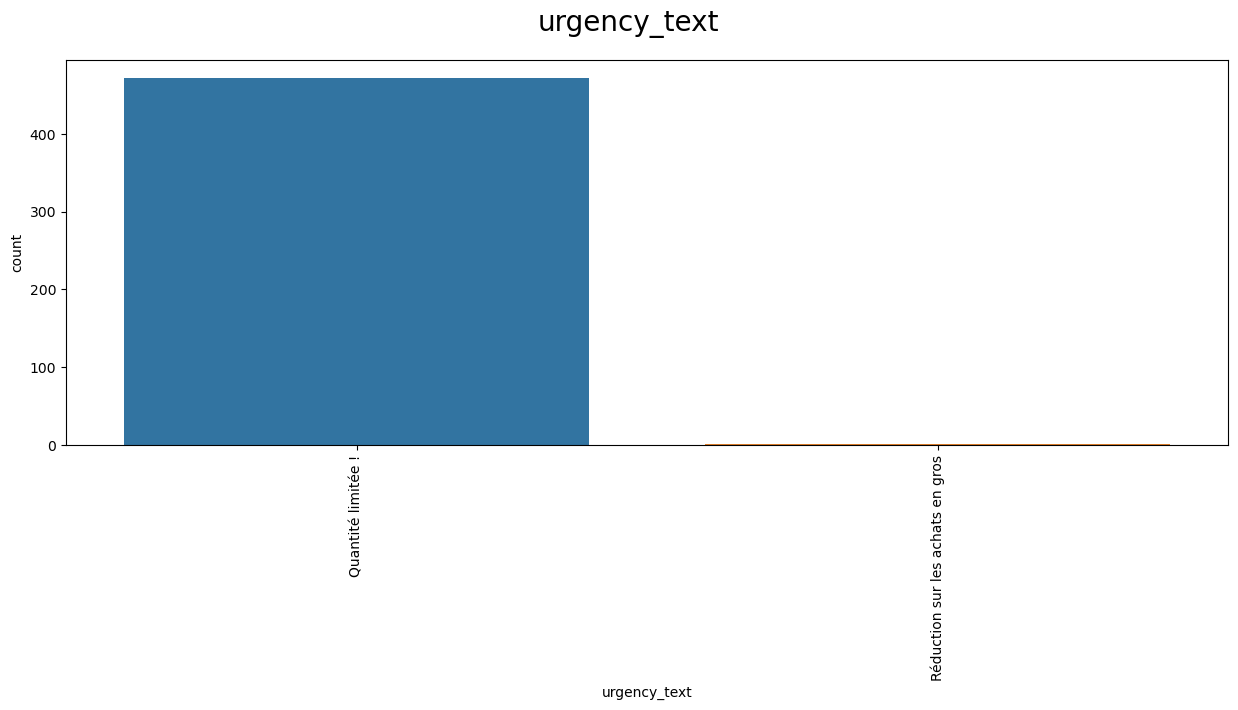

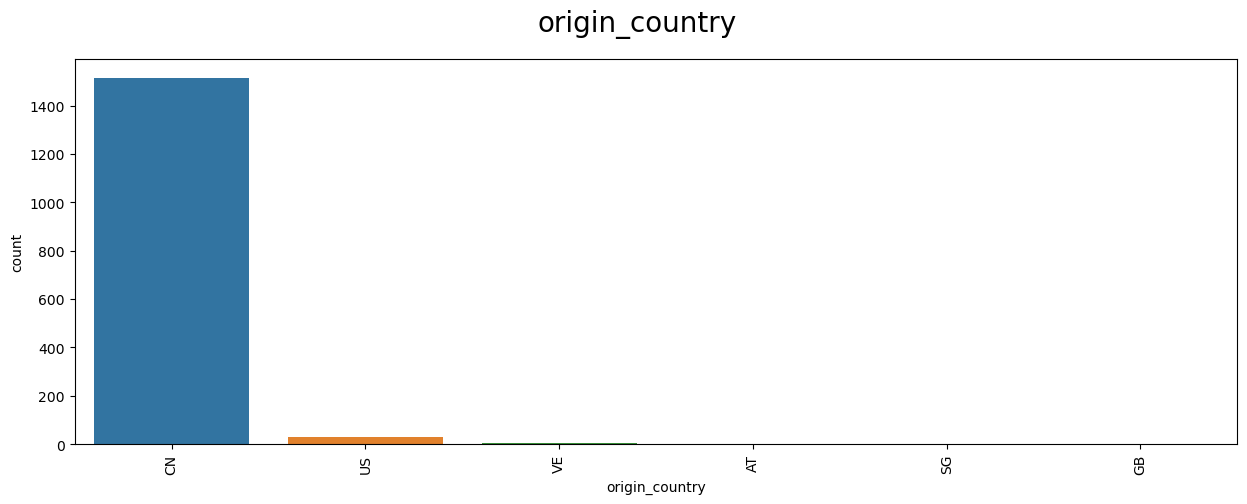

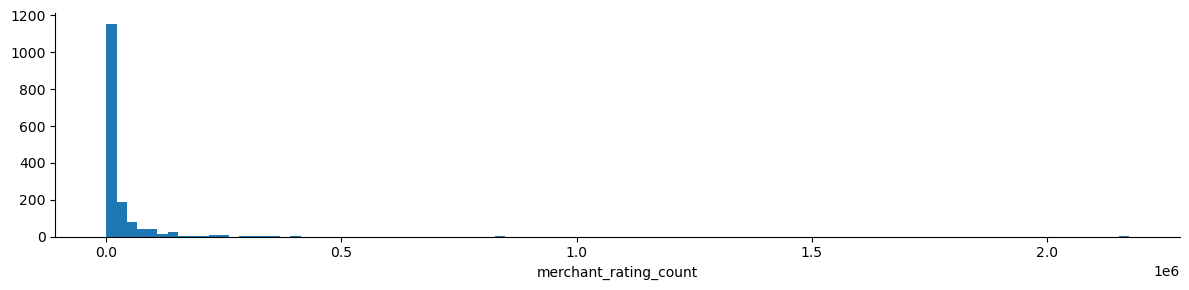

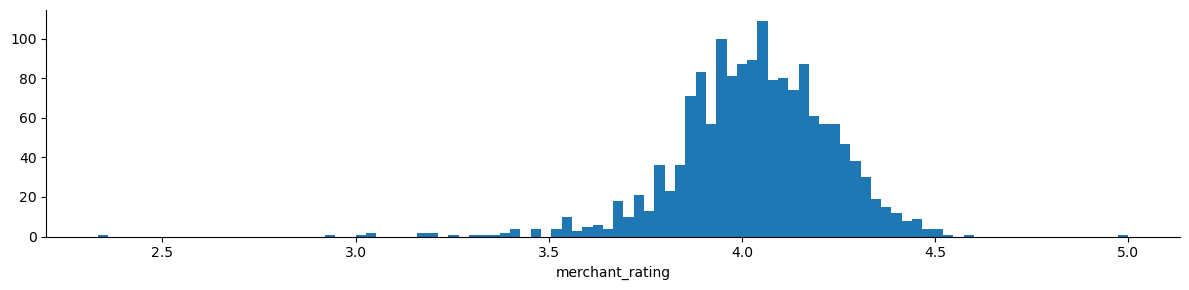

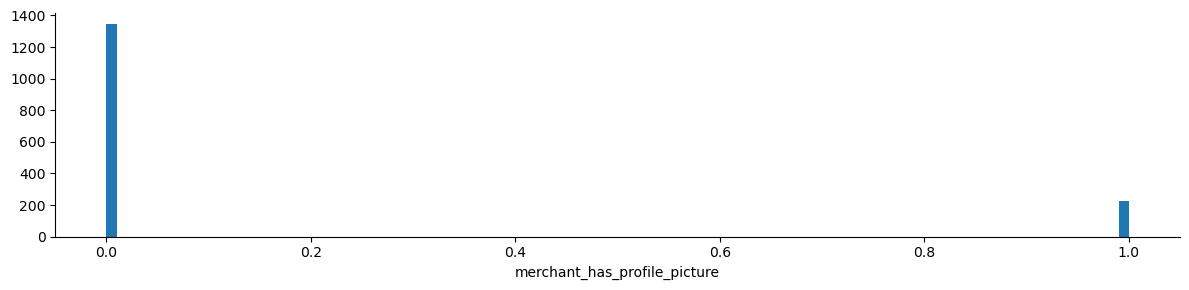

In [10]:
columns_to_exclude = ['title', 'title_orig', 'currency_buyer', 'tags', 'merchant_title', 'merchant_name', 
                'merchant_info_subtitle', 'merchant_id', 'merchant_profile_picture', 'product_url', 
                'product_picture', 'product_id', 'theme', 'crawl_month' ]


for column in df.columns:
    histograms_and_countplots(column, df, columns_to_exclude)

The distribution of prices and defining a successful product

In [11]:
print('Median of units sold is',df['units_sold'].median())
print('Mean of units sold is',df['units_sold'].mean())
df['units_sold'].value_counts()

Median of units sold is 1000.0
Mean of units sold is 4339.005085823268


units_sold
100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         49
50000      17
100000      6
8           4
1           3
7           2
2           2
3           2
6           1
Name: count, dtype: int64

In [12]:
def below_ten(units_sold):
    if units_sold < 10:
        return 10
    else:
        return units_sold

In [13]:
df['units_sold'] = df['units_sold'].apply(below_ten)

In [14]:
df['units_sold'].value_counts()

units_sold
100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         63
50000      17
100000      6
Name: count, dtype: int64

A quick look at the products with 100000 sales.

In [15]:
df[df['units_sold'] == 100000]

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
17,2018 New Fashion Women's Tops Sexy Strappy Sle...,2018 New Fashion Women's Tops Sexy Strappy Sle...,5.00,25,EUR,100000,1,3.83,17980,8290.0,...,139223,3.933581,5708773c3c02161b3f8c7900,0,NaN,https://www.wish.com/c/5b07a7c6e997b33c6f9947da,https://contestimg.wish.com/api/webimage/5b07a...,5b07a7c6e997b33c6f9947da,summer,2020-08
92,Femmes Camisole extensible Spaghetti Strap Lon...,Women Stretchy Camisole Spaghetti Strap Long T...,5.77,48,EUR,100000,0,4.10,20744,11184.0,...,330405,4.067348,53f2beb39020ee03566d6e18,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/544b079d1280fa28eee9b380,https://contestimg.wish.com/api/webimage/544b0...,544b079d1280fa28eee9b380,summer,2020-08
214,Nouveau Aeeival Femmes Vêtements À Manches Lon...,New Aeeival Women Clothing Long Sleeve Autumn ...,8.00,7,EUR,100000,1,3.76,11062,4663.0,...,108048,4.052504,5417aada4ad3ab27e954b76c,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/54bdf18039b8c045f118936a,https://contestimg.wish.com/api/webimage/54bdf...,54bdf18039b8c045f118936a,summer,2020-08
251,T-shirt à manches courtes en mousseline de soi...,Womens Summer Red White and Blue Chiffon Short...,5.00,33,EUR,100000,0,3.98,13789,6862.0,...,366898,4.036081,53082ea15aefb07dfe1f2a4f,0,NaN,https://www.wish.com/c/53897eeeafddf70c91af1cda,https://contestimg.wish.com/api/webimage/53897...,53897eeeafddf70c91af1cda,summer,2020-08
1018,Femmes dentelle manches courtes hauts hauts ch...,Women Lace Short Sleeve Long Tops Blouse Shirt...,7.00,22,EUR,100000,1,3.82,11913,5355.0,...,320031,4.218866,5357bcf2bb72c5504882e889,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/567cb0925ff12c4829f07dfb,https://contestimg.wish.com/api/webimage/567cb...,567cb0925ff12c4829f07dfb,summer,2020-08
1168,Nouvelle arrivée femmes été sexy robe de soiré...,Women's Summer Sexy Sleeveless Turtleneck Mini...,5.67,19,EUR,100000,0,3.53,18393,6769.0,...,19248,3.889131,570f3a713a698c14278bb51e,0,NaN,https://www.wish.com/c/571adeab62cce546f1a46bc0,https://contestimg.wish.com/api/webimage/571ad...,571adeab62cce546f1a46bc0,summer,2020-08


A simple function to create a new label 'is_successful':

In [16]:
def is_successful(units_sold):
    if units_sold > 1000:
        return 1
    else:
        return 0

Percent of successful products:  33.057851239669425


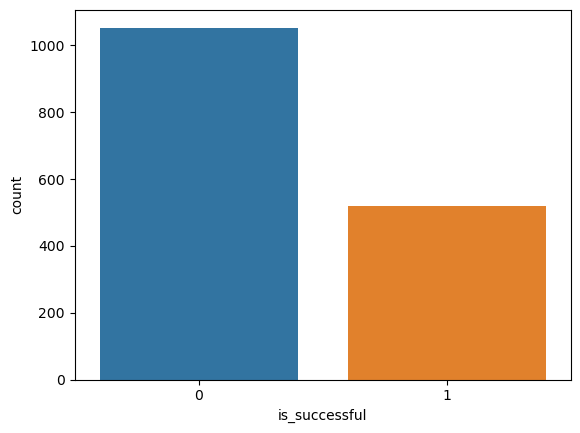

In [17]:
df['is_successful'] = df['units_sold'].apply(is_successful)
#df['is_successful'] = df['units_sold'].apply(is_successful).astype('category')
print('Percent of successful products: ', df['is_successful'].value_counts()[1] / len(df['is_successful'])*100)
sns.countplot(data=df, x='is_successful')
plt.show()

Price and retail price and the relation of their difference

In [18]:
print('Overall stats:')
print(df['price'].mean())
print(df['retail_price'].mean())
print('----------------------')
print('Stats for successful products:')
print(df[df['is_successful'] == 1]['price'].mean())
print(df[df['is_successful'] == 1]['retail_price'].mean())
print('----------------------')
print('Stats for unsuccessful products:')
print(df[df['is_successful'] == 0]['price'].mean())
print(df[df['is_successful'] == 0]['retail_price'].mean())

Overall stats:
8.325371900826447
23.28862047043865
----------------------
Stats for successful products:
8.396692307692307
22.1
----------------------
Stats for unsuccessful products:
8.290151946818614
23.87559354226021


In [19]:
df['diff_in_price'] = round(df['price']/df['retail_price'],2)
df['diff_in_price']

0       1.14
1       0.36
2       0.19
3       1.00
4       0.91
        ... 
1568    0.67
1569    0.04
1570    0.26
1571    1.18
1572    1.17
Name: diff_in_price, Length: 1573, dtype: float64

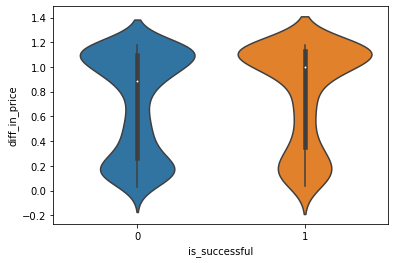

In [18]:
sns.violinplot(data=df, y='diff_in_price', x='is_successful')

The use of ad boosts to boost the success

In [19]:
print('Percent of products using ad boosts: ', df['uses_ad_boosts'].value_counts()[1] / len(df['uses_ad_boosts'])*100)

Percent of products using ad boosts:  43.293070565797834


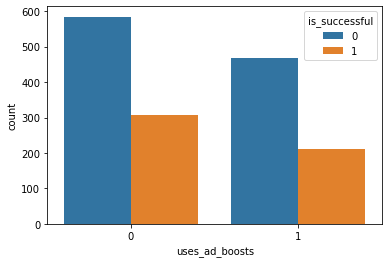

In [20]:
sns.countplot(data=df, x='uses_ad_boosts', hue='is_successful')

In [21]:
pd.crosstab(df['uses_ad_boosts'], df['is_successful'])

is_successful,0,1
uses_ad_boosts,,
0,584,308
1,469,212


In [22]:
pd.crosstab(df['uses_ad_boosts'], df['units_sold'])

units_sold,10,50,100,1000,5000,10000,20000,50000,100000
uses_ad_boosts,,,,,,,,,
0,51,50,265,218,134,104,54,13,3
1,12,26,244,187,83,73,49,4,3


Higher ratings means higher units sold

Check missing values.

In [23]:
df[df['rating_five_count'].isnull()==True][['rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count']]

,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count
74,5.0,0,NaN,NaN,NaN,NaN,NaN
112,5.0,0,NaN,NaN,NaN,NaN,NaN
126,5.0,0,NaN,NaN,NaN,NaN,NaN
189,5.0,0,NaN,NaN,NaN,NaN,NaN
216,5.0,0,NaN,NaN,NaN,NaN,NaN
248,5.0,0,NaN,NaN,NaN,NaN,NaN
309,5.0,0,NaN,NaN,NaN,NaN,NaN
346,5.0,0,NaN,NaN,NaN,NaN,NaN
348,5.0,0,NaN,NaN,NaN,NaN,NaN
375,5.0,0,NaN,NaN,NaN,NaN,NaN


In [24]:
def ratings_to_zero(rating_and_count):
    rating = rating_and_count[0]
    count = rating_and_count[1]
    
    if count == 0:
        rating = 0
    else:
        rating = rating
        
    return rating

In [25]:
df['rating'] = df[['rating', 'rating_count']].apply(ratings_to_zero, axis=1)
df['rating_five_count'].fillna(0, inplace=True)
df['rating_four_count'].fillna(0, inplace=True)
df['rating_three_count'].fillna(0, inplace=True)
df['rating_two_count'].fillna(0, inplace=True)
df['rating_one_count'].fillna(0, inplace=True)


df[df['rating_five_count'].isnull()==True][['rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count']]

,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count


In [26]:
df['rating']

0       3.76
1       3.45
2       3.57
3       4.03
4       3.10
        ... 
1568    4.08
1569    3.07
1570    3.71
1571    2.50
1572    4.07
Name: rating, Length: 1573, dtype: float64

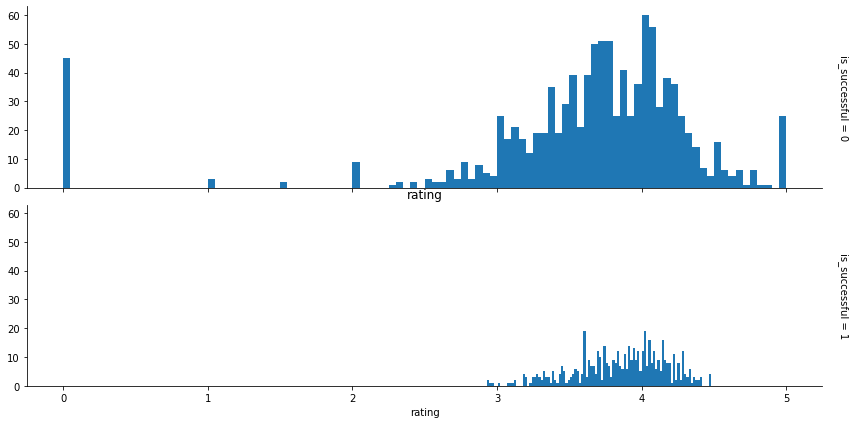

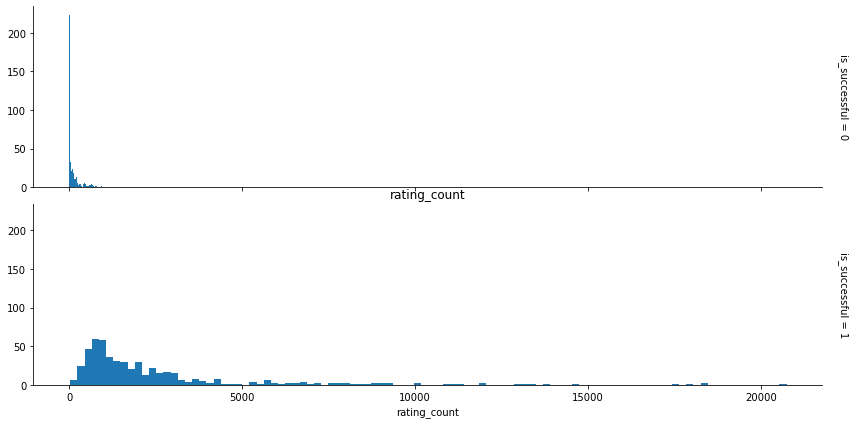

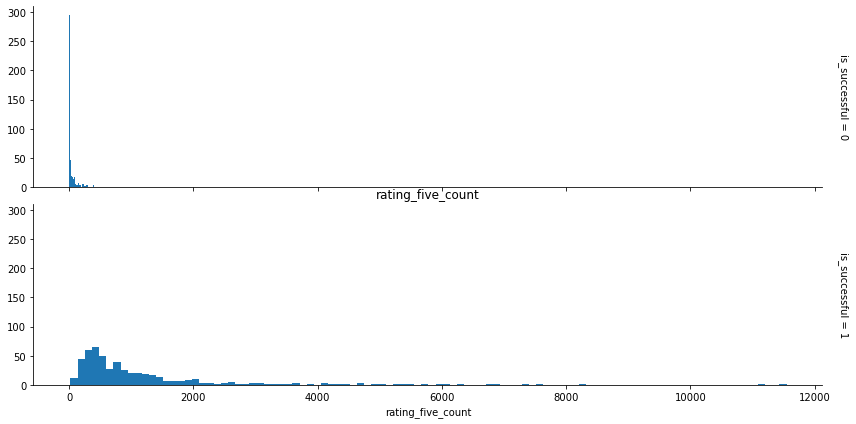

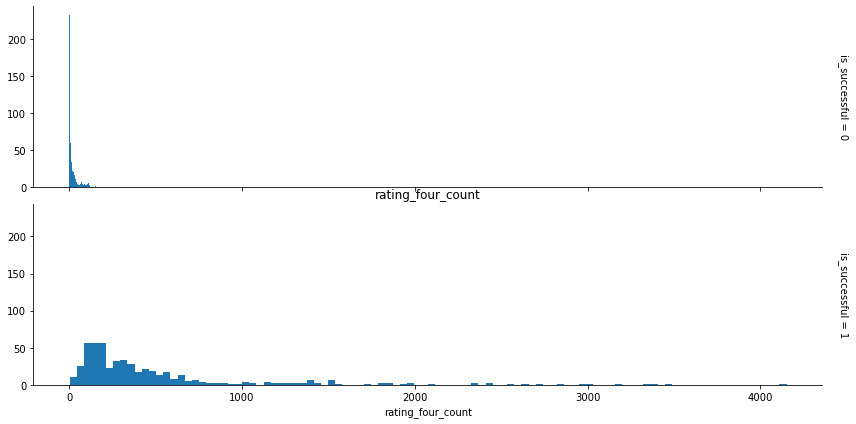

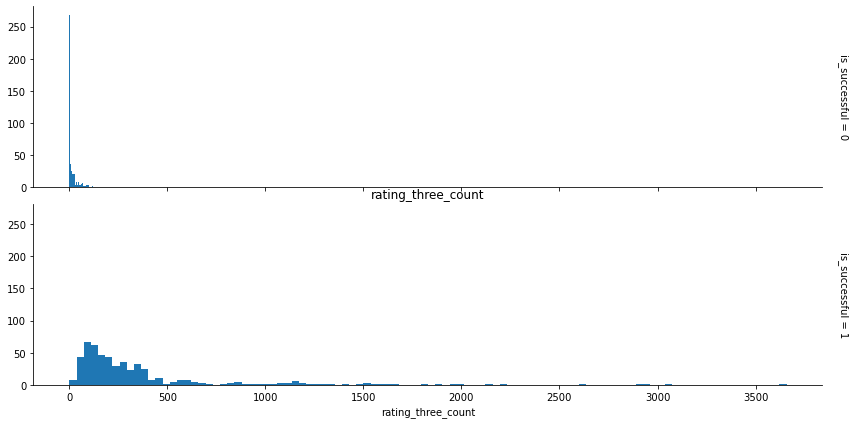

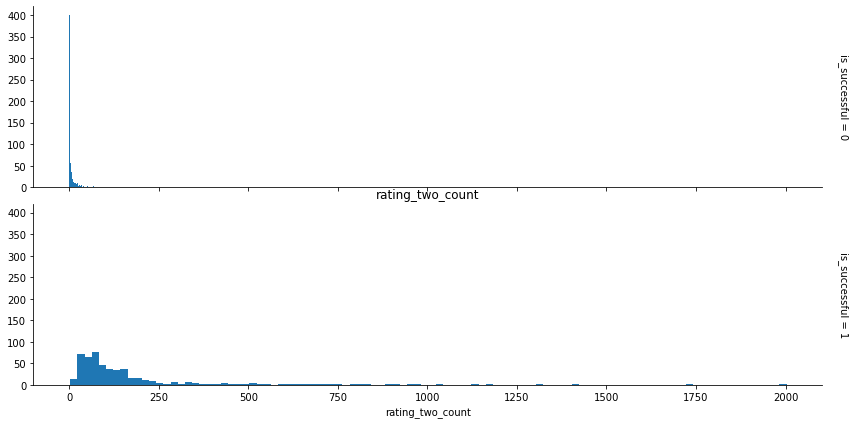

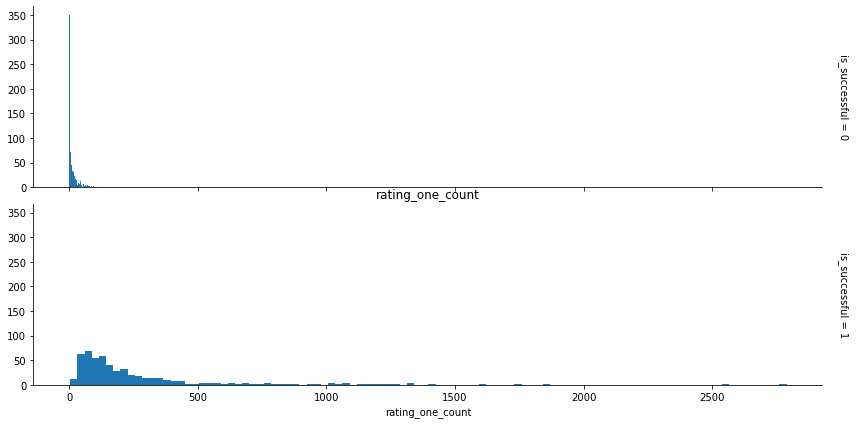

In [27]:
ratings_column = ['rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count']

for column in ratings_column:
    g = sns.FacetGrid(df, row='is_successful', margin_titles=True, aspect=4, height=3)
    g.map(plt.hist, column, bins=100)
    plt.title(column)
    plt.show()

In [28]:
df.groupby('is_successful').mean()[ratings_column]

,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count
is_successful,,,,,,,
0,3.588594,124.359924,59.143400,23.871795,17.613485,8.621083,15.110161
1,3.858615,2439.390385,1179.809615,479.405769,359.701923,169.755769,250.717308


In [29]:
df.groupby('units_sold').mean()[ratings_column]

,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count
units_sold,,,,,,,
10,1.776984,1.507937,0.587302,0.317460,0.174603,0.190476,0.238095
50,3.615263,5.315789,2.723684,1.000000,0.618421,0.434211,0.539474
100,3.636837,33.351670,15.237721,6.404715,4.726916,2.412574,4.569745
1000,3.804765,280.187654,134.019753,53.780247,39.711111,19.271605,33.404938
5000,3.820092,872.447005,416.861751,166.470046,126.009217,61.566820,101.539171
10000,3.896836,1869.937853,931.548023,369.581921,262.293785,121.310734,185.203390
20000,3.867961,4581.155340,2197.572816,905.291262,682.864078,322.242718,473.184466
50000,3.903529,10731.941176,5216.764706,2104.882353,1614.058824,762.352941,1033.882353
100000,3.836667,15646.833333,7187.166667,3120.500000,2583.500000,1215.000000,1540.666667


Badges

In [30]:
badges_column = ['badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping']

In [31]:
df[df['badges_count'] != 0][badges_column]

,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping
27,1,0,1,0
31,1,0,1,0
35,1,0,1,0
39,1,0,1,0
40,1,0,1,0
...,...,...,...,...
1529,1,0,1,0
1545,1,0,1,0
1550,1,1,0,0
1556,1,1,0,0


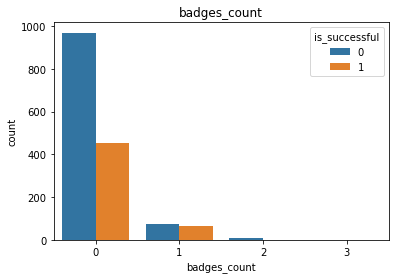

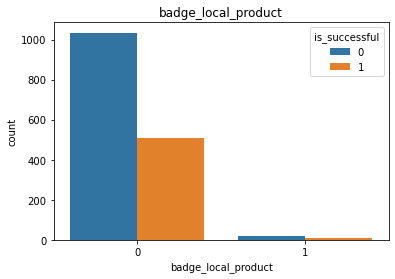

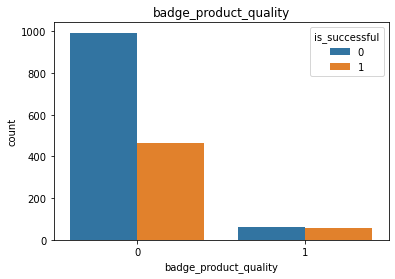

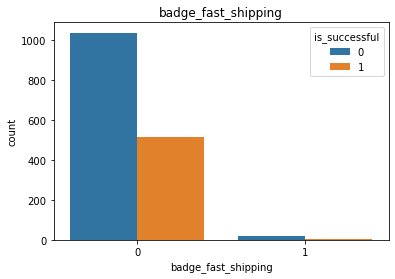

In [32]:
for column in badges_column:
    sns.countplot(data=df, x=column, hue='is_successful')
    plt.title(column)
    plt.show()

Using tags to predict success

In [33]:
from wordcloud import WordCloud, STOPWORDS

df['tags']

0       Summer,Fashion,womenunderwearsuit,printedpajam...
1       Mini,womens dresses,Summer,Patchwork,fashion d...
2       Summer,cardigan,women beachwear,chiffon,Sexy w...
3       Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...
4       Summer,Plus Size,Lace,Casual pants,Bottom,pant...
                              ...                        
1568    bohemia,Plus Size,dandelionfloralprinted,short...
1569    Summer,Panties,Elastic,Lace,Casual pants,casua...
1570    runningshort,Beach Shorts,beachpant,menbeachsh...
1571    Summer,fashion women,Fashion,Lace,Dresses,Dres...
1572    Summer,Leggings,slim,Yoga,pants,Slim Fit,Women...
Name: tags, Length: 1573, dtype: object

In [34]:
def remove_stopwords(text):
    from nltk.tokenize import word_tokenize

    text_tokens = word_tokenize(text)

    tokens_without_sw = [word for word in text_tokens if not word in STOPWORDS]
    
    filtered_sentence = (" ").join(tokens_without_sw)

    return filtered_sentence

In [35]:
df['tags'] = df['tags'].apply(remove_stopwords)

In [36]:
df['tags']

0       Summer , Fashion , womenunderwearsuit , printe...
1       Mini , womens dresses , Summer , Patchwork , f...
2       Summer , cardigan , women beachwear , chiffon ...
3       Summer , Shorts , Cotton , Cotton T Shirt , Sl...
4       Summer , Plus Size , Lace , Casual pants , Bot...
                              ...                        
1568    bohemia , Plus Size , dandelionfloralprinted ,...
1569    Summer , Panties , Elastic , Lace , Casual pan...
1570    runningshort , Beach Shorts , beachpant , menb...
1571    Summer , fashion women , Fashion , Lace , Dres...
1572    Summer , Leggings , slim , Yoga , pants , Slim...
Name: tags, Length: 1573, dtype: object

In [37]:
from collections import Counter
results = Counter()
df['tags'].str.lower().str.split().apply(results.update)
counter_df = pd.DataFrame.from_dict(results, orient='index')
counter_df.sort_values(by=0, axis=0, ascending=False).head(15)

,0
",",25750
women,3323
fashion,2807
dress,2719
summer,1872
's,1462
casual,1221
tops,835
sleeveless,835
shorts,744


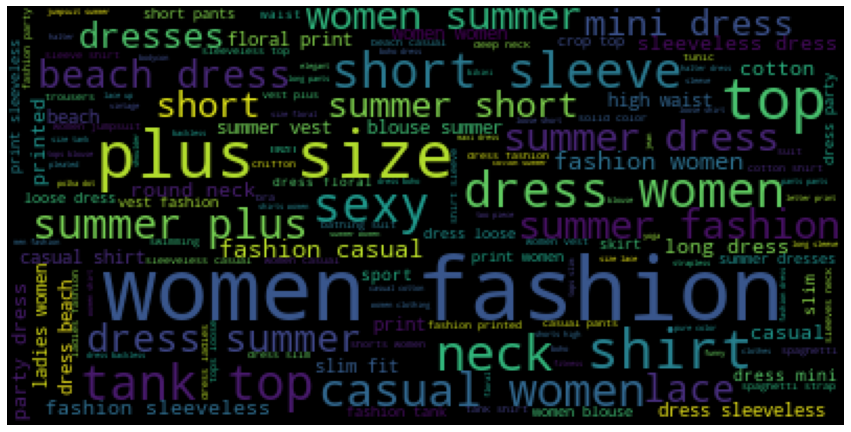

In [38]:
import matplotlib.pyplot as plt
word_string=" ".join(df['tags'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS).generate(word_string)

plt.subplots(figsize=(15,15))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

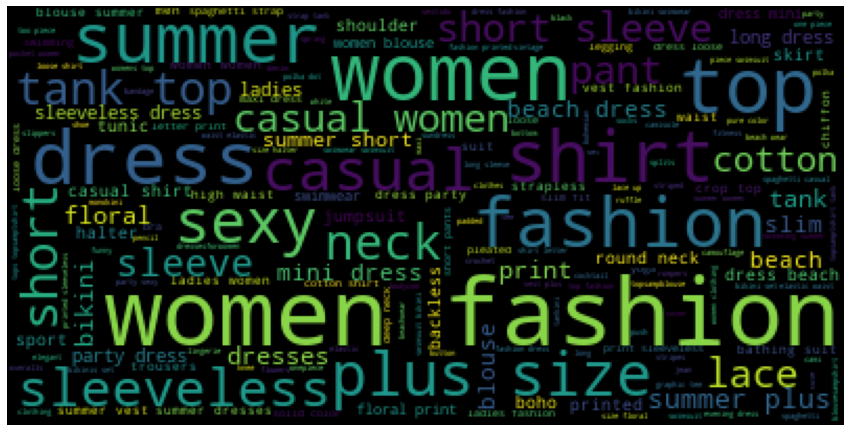

In [39]:
word_string=" ".join(df[df['is_successful']==1]['tags'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS).generate(word_string)

plt.subplots(figsize=(15,15))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

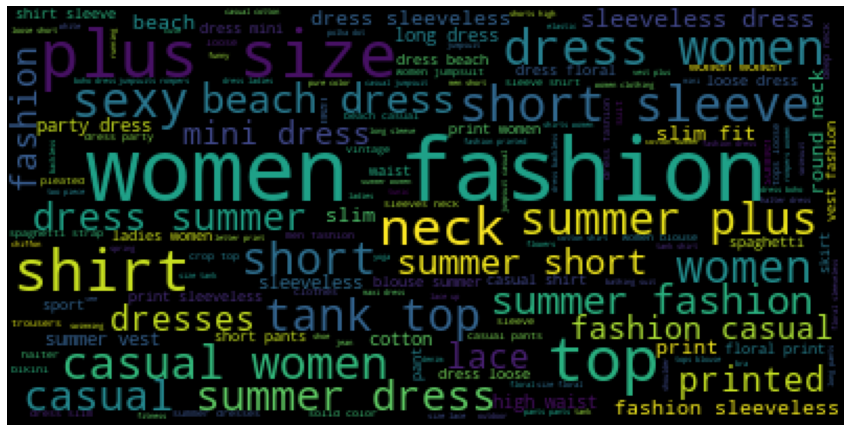

In [40]:
word_string=" ".join(df[df['is_successful']==0]['tags'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS).generate(word_string)

plt.subplots(figsize=(15,15))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

predicting success based on tags only

In [41]:
X = df['tags']
y = df['is_successful']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.33)

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn import metrics

text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=STOPWORDS)),
                         ('clf', LinearSVC(random_state=0)),
    ])

text_clf.fit(X_train, y_train)  

predictions = text_clf.predict(X_test)

print('-----------------------')
print(metrics.confusion_matrix(y_test,predictions))
print('-----------------------')
print(metrics.classification_report(y_test,predictions))

-----------------------
[[286  57]
 [113  64]]
-----------------------
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       343
           1       0.53      0.36      0.43       177

    accuracy                           0.67       520
   macro avg       0.62      0.60      0.60       520
weighted avg       0.65      0.67      0.65       520



Converting textual features to numeric features

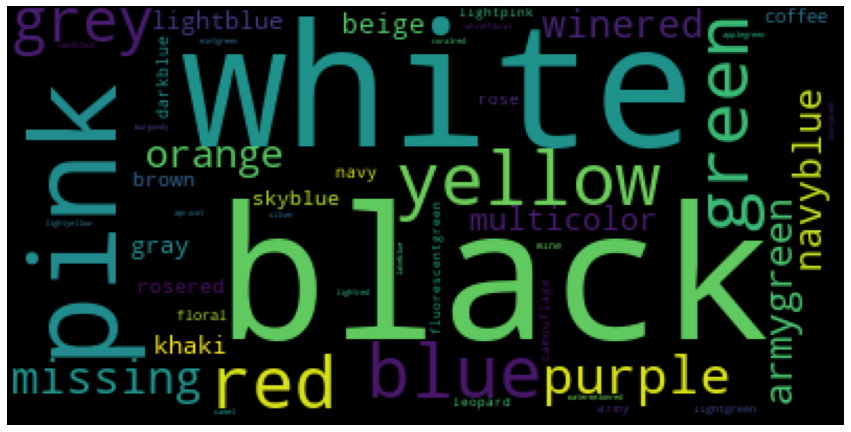

In [42]:
df['product_color'].fillna('missing', inplace=True)
word_string=" ".join(df['product_color'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS).generate(word_string)

plt.subplots(figsize=(15,15))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

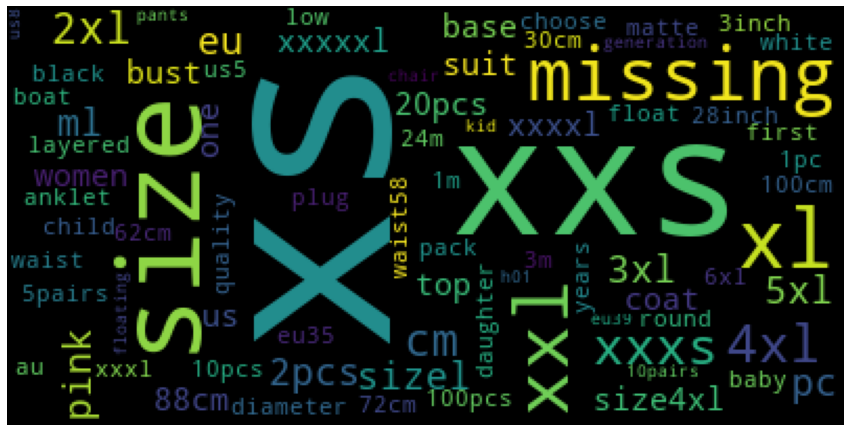

In [43]:
df['product_variation_size_id'].fillna('missing', inplace=True)
word_string=" ".join(df['product_variation_size_id'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS).generate(word_string)

plt.subplots(figsize=(15,15))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Shiping

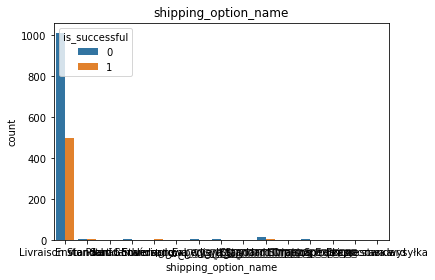

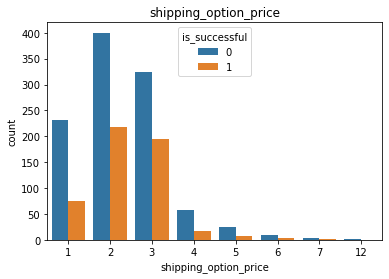

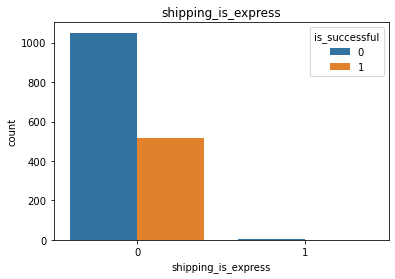

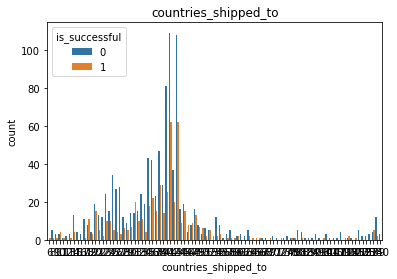

In [44]:
shipping_column = ['shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to']

for column in shipping_column:
    sns.countplot(data=df, x=column, hue='is_successful')
    plt.title(column)
    plt.show()

Better to visualise the 'countries_shipped_to' column with a violin plot.

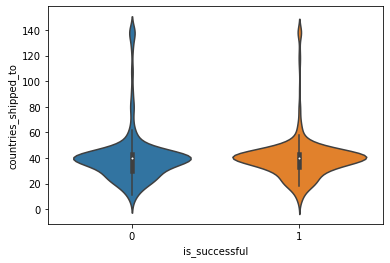

In [45]:
sns.violinplot(data=df, y='countries_shipped_to', x='is_successful')

Inventory levels

In [46]:
df['inventory_total'].value_counts()

50    1563
2        2
40       1
38       1
37       1
36       1
30       1
24       1
9        1
1        1
Name: inventory_total, dtype: int64

In [47]:
df['product_variation_inventory'].value_counts()

50    907
1     152
2      81
5      74
3      52
10     40
4      25
9      22
7      18
6      18
20     16
15     13
17     11
18     10
49      9
13      8
19      7
29      7
25      7
44      6
8       6
11      6
46      6
30      6
12      5
14      5
47      4
34      4
35      4
36      4
41      4
43      4
48      4
27      3
45      3
23      2
21      2
26      2
28      2
31      2
37      2
38      2
39      2
40      2
16      1
22      1
33      1
24      1
Name: product_variation_inventory, dtype: int64

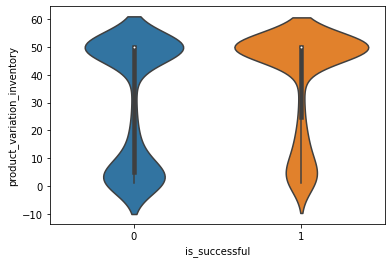

In [48]:
sns.violinplot(data=df, y='product_variation_inventory', x='is_successful')

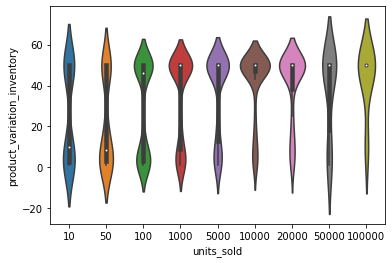

In [49]:
sns.violinplot(data=df, y='product_variation_inventory', x='units_sold')

Urgency and country of origins

In [50]:
df['has_urgency_banner'].fillna(0, inplace=True)
df['urgency_text'].fillna(0, inplace=True)

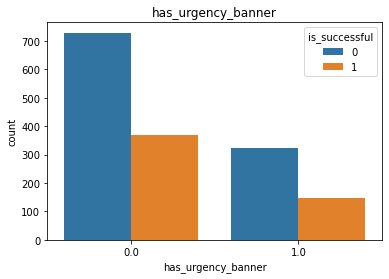

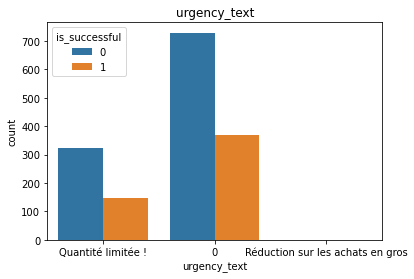

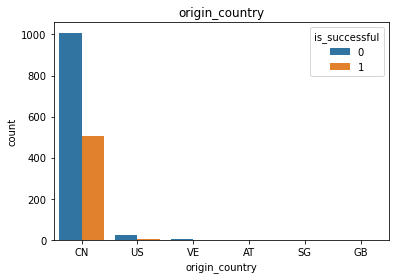

In [51]:
urgency_column = ['has_urgency_banner', 'urgency_text', 'origin_country']

for column in urgency_column:
    sns.countplot(data=df, x=column, hue='is_successful')
    plt.title(column)
    plt.show()

Successful merchants

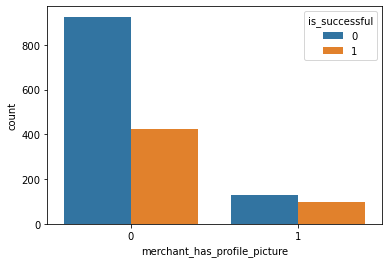

In [52]:
merchant_columns = ['merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture']


sns.countplot(data=df, x='merchant_has_profile_picture', hue='is_successful')

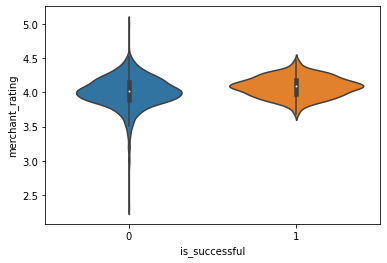

In [53]:
sns.violinplot(data=df, y='merchant_rating', x='is_successful')

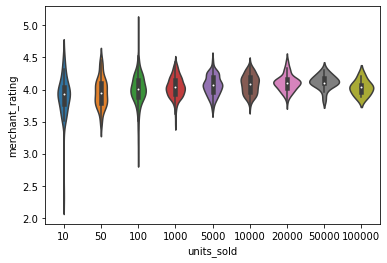

In [54]:
sns.violinplot(data=df, y='merchant_rating', x='units_sold')

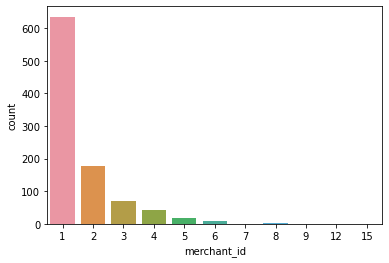

In [55]:
sns.countplot(x=df['merchant_id'].value_counts())

The model

From the analysis above, I don't think this data is suitable for building a model as there is very minimal relation I noticed between data features and success. Also most features are impacted by success and not the other way round. however, I want to try out the SelectKBest feature selection, so here goes nothing...

In [56]:
df.drop(labels=['title', 'title_orig', 'currency_buyer', 'merchant_title', 'merchant_name', 
                'merchant_info_subtitle', 'merchant_id', 'merchant_profile_picture', 'product_url', 
                'product_picture', 'product_id', 'theme', 'crawl_month', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'units_sold','badges_count',
       'badge_local_product','badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to','has_urgency_banner', 'urgency_text',
       'origin_country'], axis=1, inplace=True)

In [57]:
df.columns

Index(['price', 'retail_price', 'uses_ad_boosts', 'badge_product_quality',
       'product_variation_inventory', 'inventory_total',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'is_successful', 'diff_in_price'],
      dtype='object')

In [58]:
y = df['is_successful']
X = df[['price', 'retail_price', 'uses_ad_boosts', 'badge_product_quality',
       'product_variation_inventory',
       'inventory_total', 'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture','diff_in_price']]

In [59]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)


models = [LogisticRegression(), DecisionTreeClassifier(), XGBClassifier(),  
          GradientBoostingClassifier(), KNeighborsClassifier(), RandomForestClassifier()]

for model in models:
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(model)
    print('---------------------------')
    print(metrics.classification_report(y_test,y_pred))
    print('')
    print('')

LogisticRegression()
---------------------------
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       375
           1       0.60      0.26      0.37       145

    accuracy                           0.75       520
   macro avg       0.68      0.60      0.60       520
weighted avg       0.72      0.75      0.71       520



DecisionTreeClassifier()
---------------------------
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       375
           1       0.47      0.57      0.51       145

    accuracy                           0.70       520
   macro avg       0.64      0.66      0.65       520
weighted avg       0.72      0.70      0.71       520



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

for k in range(1,11):
    
    print(k)
    print('---------------')
    y = df['is_successful']
    X = df[['price', 'retail_price', 'uses_ad_boosts', 'badge_product_quality',
       'product_variation_inventory',
       'inventory_total', 'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture','diff_in_price']]


    X = SelectKBest(chi2, k=k).fit_transform(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)


    models = [LogisticRegression(), DecisionTreeClassifier(), XGBClassifier(),  
          GradientBoostingClassifier(), KNeighborsClassifier(), RandomForestClassifier()]

    for model in models:
    
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
        print(model)
        print('---------------------------')
        print(metrics.accuracy_score(y_test,y_pred))
        print('')
        print('')


1
---------------
LogisticRegression()
---------------------------
0.28076923076923077


DecisionTreeClassifier()
---------------------------
0.7346153846153847


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
---------------------------
0.7096153846153846


GradientBoostingClassifier()
---------------------------
0.7346153846153847


KNeighborsClassifier()
---------------------------
0.698076923076923


RandomForestClassifier()
---------------------------
0.73

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

y = df['is_successful']
X = df[['price', 'retail_price', 'uses_ad_boosts', 'badge_product_quality',
       'product_variation_inventory',
       'inventory_total', 'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture','diff_in_price']]


X = SelectKBest(chi2, k=8).fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)


models = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.accuracy_score(y_test,y_pred))


0.775


Conclusions
- The site mainly sells female clothing.
- Higher units sold means higher rating count.
- The use of ad boosts does not seen to have any effect on the units sold and the site may lose revenue from this ads.
- More detailed units sold and inventory levels would have been more helpful for analysis.
- Product quality badges seems to increase the success of the products. Perhaps reviewing more products will increase motivation for merchants to improve their product? Different levels of badges can be applied?
- The tags can be improved so that products can be categorised more specfically. This can be done by reducing the number of tags per product, so the mechants are forced to choose their tags more wisely.
- Majority of the products are black and white. This might have been defined wrongly by the merchants. If not the case, the merchants can be encoured to include more variation to these.